# Ein kurzer Blick auf Pandas

Spätestens wenn wir Simulationsexperimente durchführen und die Ergebnisse von Simulationsmodellen mit verschiedenen Parametereinstellungen systematisch vergleichen wollen, macht es Sinn, die produzierten Daten als einen schön strukturierten Datensatz abzuspeichern. Damit meine ich nichts anderes als eine klassische Tabelle, in denen unsere Daten in Spalten und Zeilen eingetragen sind, so wie man das z.B. aus Excel, SPSS, R oder Stata kennt. Ein Beispiel für eine solche *Tabelle* siehst du unten:

![](img/beispiel_df.png)

In Python gibt es für das Erstellen, Aufbereiten und Auswerten solcher tabellenförmiger Datensätze das Paket **Pandas**. Pandas gehört zu **DEN** grundlegenden Paketen für das wissenschaftliche Arbeiten mit Python. Das primäre Objekt, welches Pandas liefert, ist der sogenannte **DataFrame**. Das ist genau eine solche Tabelle, wie man in der obigen Abbildung sieht.

```{admonition} Zur Info
Pandas kannst du wie gewohnt über den Anaconda-Navigator installieren. Beim Import von Pandas hat sich die Abkürzung `pd` etabliert: `import pandas as pd`
```

## Dataframe erstellen

Das wichtigste ist natürlich zunächst das Erstellen eines Dataframes. Dafür gibt es in Pandas zahlreiche Möglichkeiten, welche sich darin unterscheiden, in welcher Form man die Daten an Pandas übergibt. Im Folgenden stelle ich zwei Möglichkeiten vor.

### Möglichkeit 1 - Dataframe aus einem Dictionary erstellen

Bei dieser Variante einen Dataframe zu erstellen, müssen die Daten zunächst in Form eines Dictionary vorliegen. Unten siehst du ein Beispiel dafür:

In [83]:
data_dict = {
    "density": [1.0, 0.5, 0.33, 0.25, 0.2, 0.1],
    "speed"  : [0.0, 1.0, 2.0, 3.0, 4.0, 5.0],
}

In jedem *Eintrag* des Dictionary liegt eine Datenreihe in Form einer Liste. Jeder Eintrag des Dictionary wird gleich in eine Tabellenspalte eines Dataframes umgewandelt.

Um aus dem obigen Dictionary einen Dataframe zu erstellen, muss man nichts anderes tun als das Dictionary in den Dataframe-Konstruktör `pd.DataFrame()` einzugeben und den entstehenden Dataframe in einer Variable zu speichern, so wie das unten passiert:

In [84]:
import pandas as pd

df = pd.DataFrame(data_dict)

Unten schaue ich mir nun den unter `df` gespeicherten Dataframe an:

In [95]:
df

,density,speed
0,1.00,0.0
1,0.50,1.0
2,0.33,2.0
3,0.25,3.0
4,0.20,4.0
5,0.10,5.0


Wir sehen, jede Liste/Datenreihe, die als Eintrag im obigen Dictionary `data_dict` vorliegt, wird in eine Tabellenspalte des Dataframes verwandelt.

### Möglichkeit 2 - Dataframe aus mehreren Dictionaries erstellen

Anstatt den Dataframe aus einem Dictionary, welches Listen mit Daten enthält, kann man andersherum auch einen Dataframe aus einer Liste, welche Dictionaries mit den Daten enthält, erstellen. Diese Vorgehensweise bietet sich v.a. im Bereich von ABM an.

Unten siehst du beispielhaft, wie eine solche Liste mit Dictionaries aussehen kann. Jedes Dictionary entspricht einer Zeile eines Dateframes. Jeder Eintrag eines Dictionary wird anhand des Dictionary-Keys einer Spalte zugewiesen.

In [92]:
data_dicts = [
    {"density": 1.0,  "speed": 0.0},
    {"density": 0.5,  "speed": 1.0},
    {"density": 0.33, "speed": 2.0},
    {"density": 0.25, "speed": 3.0},
    {"density": 0.2,  "speed": 4.0},
    {"density": 0.1,  "speed": 5.0},
]

Unten füge ich - genau wie oben - die Daten in den Befehl `pd.DataFrame()` ein, um den Dataframe zu erstellen:

In [93]:
df = pd.DataFrame(data_dicts)

Wie man sieht, haben wir nun den gleichen Dataframe wie oben erstellt:

In [94]:
df

,density,speed
0,1.00,0.0
1,0.50,1.0
2,0.33,2.0
3,0.25,3.0
4,0.20,4.0
5,0.10,5.0


## Auf eine Spalte zugreifen

## Dataframe exportieren

Wir können Dataframes als u.a. im CSV-Format exportieren und auf der Festplatte speichern. Das ist praktisch, weil wir so nicht nur unsere Daten langfristig speichern können, sondern die Daten auch mit einem Statistik-Programm unserer Wahl öffnen und auswerten können. Das bietet sich v.a. in diesem Kurs an, weil wir hier in Python nur ganz oberflächlich Auswertungsmethoden kennenlernen. Falls du also mit einem anderen Statistik-Programm gut zurecht kommst, ist es z.B. denkbar, dass du die in Python gewonnen Simulationsdaten als Dataframe im CSV-Format exportierst und dann die Datenaufbereitung und Auswertung in einem anderen Programm vollziehst (z.B. R oder SPSS).

Für den Export eines Dataframes im CSV-Format gibt es in Pandas die `DataFrame`-Methode `to_csv()`. Um einen betimmten Dataframe zu speichern, muss man die Methode von dem entsprechenden Dataframe aus ausführen und einen Dateipfad/Dateinamen eingeben. Der Dateiname muss auf `.csv` enden, da wir die Datei im CSV-Format speichern. Unten speichere ich den Dataframe namens `df` unter dem Namen `"simulationsergebnisse.csv"` auf meinem Computer.

In [97]:
df.to_csv("simulationsergebnisse.csv")

## Diagramme mit Seaborn

In [10]:
import seaborn as sns

<AxesSubplot:xlabel='density', ylabel='speed'>

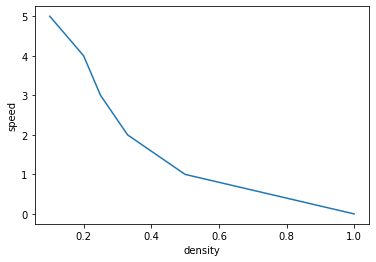

In [12]:
sns.lineplot(x="density", y="speed", data=df)

## Ein Simulationsexperiment durchführen



In [60]:
import random 


def nasch_model(
    ticks=1000, 
    max_speed=5,
    dawdling_prob=0.1,
    n_agents=100,
    initial_distance=6,
):
    
    speed_data = []

    street_len = n_agents * initial_distance

    # Leere Liste, die gleich mit Agenten befüllt wird
    population = []

    # für jeden zu erstellenden Agenten
    for i in range(n_agents):

        # Agent als Dictionary erstellen
        agent = {
            "id": i,
            "position": i * initial_distance,
            "speed": max_speed,
            "space_ahead": initial_distance - 1,
        }

        # Agent an die Populationsliste hängen
        population.append(agent)


    # Population nochmal überarbeiten - jeweils vorausfahrende und nachfahrende Agenten einspeichern
    # für jeden Agenten in Population
    for agent in population:
        # den vorausfahrenden Agenten merken/als Eigenschaft einspeichern
        agent.update({"agent_ahead": population[(agent["id"]+1)%len(population)]})

        # den nachfahrenden Agenten merken/als Eigenschaft einspeichern
        agent.update({"agent_behind": population[(agent["id"]-1)%len(population)]})


    # für jeden Zeitschritt
    for tick in range(ticks):

        # für jeden Agenten (die vier Handlungsschritte umsetzen)
        for agent in population:
            # 1. Acceleration
            if agent["speed"] < max_speed:
                agent["speed"] += 1

            # 2. Slowing down
            if agent["speed"] > agent["space_ahead"]:
                agent["speed"] = agent["space_ahead"]

            # 3. Randomization
            if agent["speed"] > 0 and random.random() <= dawdling_prob:
                agent["speed"] -= 1

            # 4. Car motion
            agent["position"] = (agent["position"] + agent["speed"]) % street_len



        # für jeden Agenten (die Anzahl der freien Straßenabschnitte neu berechnen)
        for agent in population:
            # neue Anzahl der freien Zellen vor Agent berechnen und einspeichern
            agent["space_ahead"] -= agent["speed"]
            # neue Anzahl der freien Zellen vor dem NACHFAHRENDEM Agent berechnen und DIESEM einspeichern
            agent["agent_behind"]["space_ahead"] += agent["speed"]

        
        # Von allen Agenten die aktuelle Geschwindigkeit sammeln
        for agent in population:
            speed_data.append(agent["speed"])
    
    # Durchschnittliche Geschwindigkeit pro Agent pro Zeitschritt berechnen
    mean_speed = sum(speed_data) / n_agents / ticks
    
    
    # Ausgabe-Datensatz erstellen
    output_dict = {
        "initial_distance": initial_distance,
        "mean_speed": mean_speed,
        "dawdling_prob": dawdling_prob,
        "ticks": ticks,
        "n_agents": n_agents,
    }
    
    return output_dict

In [61]:
nasch_model(initial_distance=3)

{'initial_distance': 3,
 'mean_speed': 1.6516199999999999,
 'dawdling_prob': 0.1,
 'ticks': 1000,
 'n_agents': 100}

In [62]:
nasch_model(initial_distance=2)

{'initial_distance': 2,
 'mean_speed': 0.84102,
 'dawdling_prob': 0.1,
 'ticks': 1000,
 'n_agents': 100}

In [63]:
data = []
for i in range(5):
    initial_distance = i + 1
    simulation_results = nasch_model(initial_distance=initial_distance)
    data.append(simulation_results)

In [64]:
data

[{'initial_distance': 1,
  'mean_speed': 0.0,
  'dawdling_prob': 0.1,
  'ticks': 1000,
  'n_agents': 100},
 {'initial_distance': 2,
  'mean_speed': 0.83398,
  'dawdling_prob': 0.1,
  'ticks': 1000,
  'n_agents': 100},
 {'initial_distance': 3,
  'mean_speed': 1.6476,
  'dawdling_prob': 0.1,
  'ticks': 1000,
  'n_agents': 100},
 {'initial_distance': 4,
  'mean_speed': 2.4460300000000004,
  'dawdling_prob': 0.1,
  'ticks': 1000,
  'n_agents': 100},
 {'initial_distance': 5,
  'mean_speed': 3.24733,
  'dawdling_prob': 0.1,
  'ticks': 1000,
  'n_agents': 100}]

In [65]:
df = pd.DataFrame(data)

In [66]:
df

,initial_distance,mean_speed,dawdling_prob,ticks,n_agents
0,1,0.00000,0.1,1000,100
1,2,0.83398,0.1,1000,100
2,3,1.64760,0.1,1000,100
3,4,2.44603,0.1,1000,100
4,5,3.24733,0.1,1000,100


In [67]:
df["traffic_density"] = 1 / df["initial_distance"]

In [68]:
df

,initial_distance,mean_speed,dawdling_prob,ticks,n_agents,traffic_density
0,1,0.00000,0.1,1000,100,1.000000
1,2,0.83398,0.1,1000,100,0.500000
2,3,1.64760,0.1,1000,100,0.333333
3,4,2.44603,0.1,1000,100,0.250000
4,5,3.24733,0.1,1000,100,0.200000


<AxesSubplot:xlabel='traffic_density', ylabel='mean_speed'>

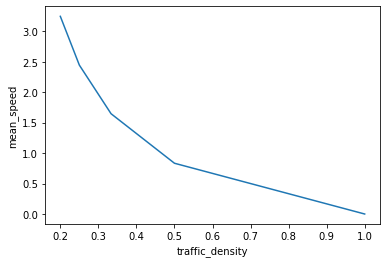

In [69]:
sns.lineplot(x="traffic_density", y="mean_speed", data=df)

In [70]:
data = []
for i in range(5):
    for replication in range(3):
        initial_distance = i + 1
        simulation_results = nasch_model(initial_distance=initial_distance)
        data.append(simulation_results)

In [71]:
df = pd.DataFrame(data)

df

,initial_distance,mean_speed,dawdling_prob,ticks,n_agents
0,1,0.00000,0.1,1000,100
1,1,0.00000,0.1,1000,100
2,1,0.00000,0.1,1000,100
3,2,0.84048,0.1,1000,100
4,2,0.84148,0.1,1000,100
5,2,0.84293,0.1,1000,100
6,3,1.65094,0.1,1000,100
7,3,1.64864,0.1,1000,100
8,3,1.64660,0.1,1000,100
9,4,2.42860,0.1,1000,100


<AxesSubplot:xlabel='traffic_density', ylabel='mean_speed'>

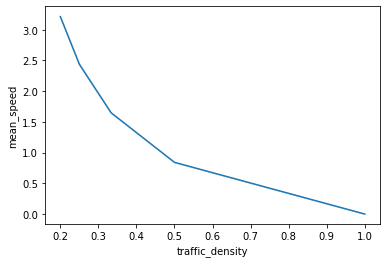

In [72]:
df["traffic_density"] = 1 / df["initial_distance"]
sns.lineplot(x="traffic_density", y="mean_speed", data=df)

In [73]:
data = []
for dawdling_prob in [0, 0.3]:
    for i in range(5):
        initial_distance = i + 1
        simulation_results = nasch_model(initial_distance=initial_distance, dawdling_prob=dawdling_prob)
        data.append(simulation_results)

In [74]:
df = pd.DataFrame(data)

df

,initial_distance,mean_speed,dawdling_prob,ticks,n_agents
0,1,0.00000,0.0,1000,100
1,2,1.00000,0.0,1000,100
2,3,2.00000,0.0,1000,100
3,4,3.00000,0.0,1000,100
4,5,4.00000,0.0,1000,100
5,1,0.00000,0.3,1000,100
6,2,0.59649,0.3,1000,100
7,3,1.15049,0.3,1000,100
8,4,1.69848,0.3,1000,100
9,5,2.24390,0.3,1000,100


<AxesSubplot:xlabel='traffic_density', ylabel='mean_speed'>

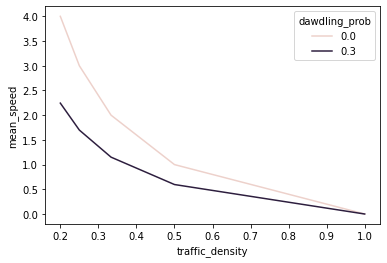

In [75]:
df["traffic_density"] = 1 / df["initial_distance"]
sns.lineplot(x="traffic_density", y="mean_speed", hue="dawdling_prob", data=df)